<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 1 : Chargement des données</span></H2>
</center>

In [9]:
import pandas as pd
# 1. Importer les données à l'aide de la bibliothèque Pandas.
df = pd.read_csv("assurance-maladie-68d92978e362f464596651.csv")

# 2. Vérifier le type et la structure des colonnes.

# Informations générales sur le dataset
print(df.info())

# Dimensions du dataset
print("Nombre de lignes et colonnes :", df.shape)

# Vérifier les types et un aperçu rapide
print(df.dtypes)

# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
Nombre de lignes et colonnes : (1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


<center>
<H2><span style="text-align: center; font-weight: bold; color: #746bb3ff;">Tâche 2 : Analyse exploratoire des données (EDA)</span></H2>
</center>

🔹 Sous-tâche 1 : Comprendre la structure générale


In [10]:
# Dimensions du dataset
print("Dimensions :", df.shape)

# Types de colonnes
print("Types de données :\n", df.dtypes)

# Aperçu des premières lignes
print(df.head())

Dimensions : (1338, 7)
Types de données :
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


🔹 Sous-tâche 2 : Analyse descriptive

In [12]:
# Dimensions du dataset
print("Dimensions :", df.shape)

# Types de colonnes
print("Types de données :\n", df.dtypes)

# Aperçu des premières lignes
print(df.head())

# ---- Variables numériques ----
print("Statistiques générales (numériques) :")
print(df.describe())   # Moyenne, écart-type, min, max, quartiles

# Médianes
print("\nMédianes des variables numériques :")
print(df.median(numeric_only=True))

# ---- Variables catégorielles ----
print("\nFréquences des variables catégorielles :")
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print(f"\nVariable : {col}")
    print(df[col].value_counts())
    print("-"*40)


Dimensions : (1338, 7)
Types de données :
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Statistiques générales (numériques) :
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.40

🔹 Sous-tâche 3  :Identifier les valeurs manquantes et les doublons.

In [8]:
print("===== Vérification des valeurs manquantes =====\n")
print(df.isnull().sum())   # nombre de valeurs manquantes par colonne

print("\n===== Vérification des doublons =====\n")
nb_duplicated = df.duplicated().sum()
print(f"Nombre de doublons : {nb_duplicated}")

===== Vérification des valeurs manquantes =====

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

===== Vérification des doublons =====

Nombre de doublons : 1


🔹 Sous-tâche 4  :Analyser la distribution des variables numériques (ex. : histogrammes avec Matplotlib/Seaborn)

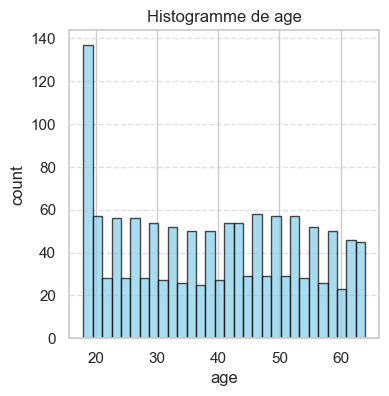

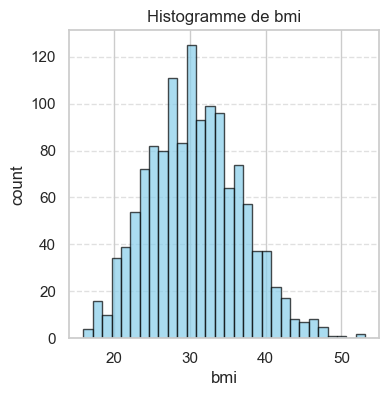

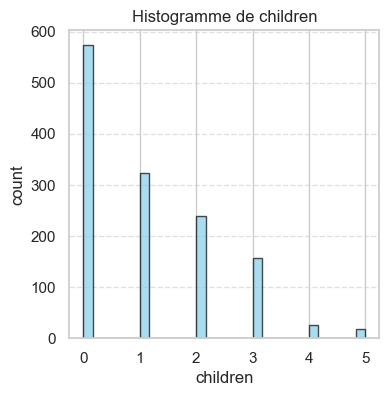

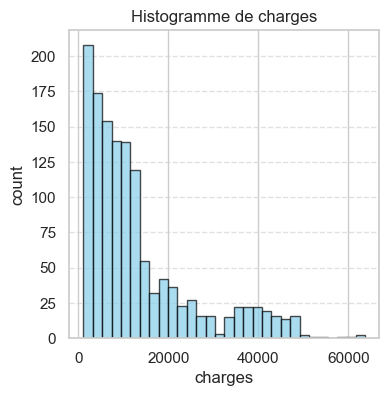

In [13]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(4,4))
    plt.hist(df[col].dropna(), bins=30, color="skyblue", edgecolor="black", alpha=0.7)
    plt.title(f"Histogramme de {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.show()